<h1><center> ComS 574     </center></h1>
<h1><center> HW 5 </center></h1>
<h1><center> Kanak Choudhury </center></h1>

# Problem 1 & 2

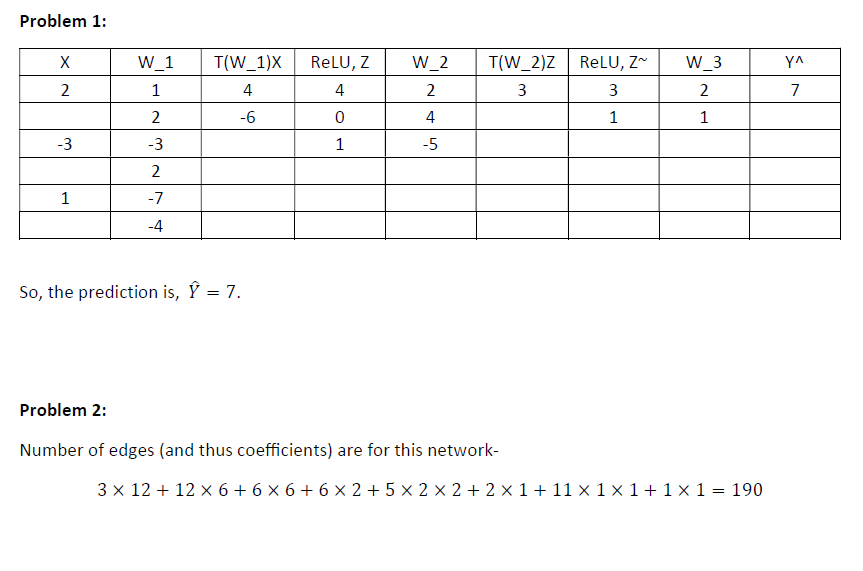

In [288]:
from IPython.display import display, Image
from PIL import Image as imm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

img_org = imm.open('D:/ISU/COMS 574 - Introduction to Machine Learning/HW/HW5/HW5_Problem1&2.png')
display(img_org)

# Problem 3

In [289]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

Coeﬃcient values for A:

w_1 = 2
w_2 = 2
w_2 = -1
w~ = 1
Coeﬃcient values for B:

w_1 = -2
w_2 = 0
w_2 = 1
w~ = 1
Coeﬃcient values for C:

w_1 = -2
w_2 = 2
w_2 = -1
w~ = 1


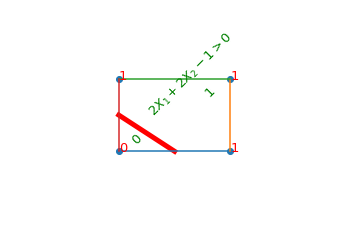

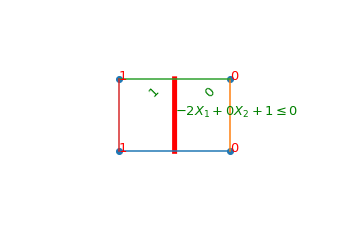

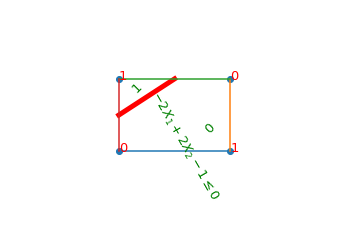

In [290]:
print('Coeﬃcient values for A:\n')
print('w_1 = %d\nw_2 = %d\nw_2 = %d\nw~ = %d' %(2,2,-1,1))

print('Coeﬃcient values for B:\n')
print('w_1 = %d\nw_2 = %d\nw_2 = %d\nw~ = %d' %(-2,0,1,1))

print('Coeﬃcient values for C:\n')
print('w_1 = %d\nw_2 = %d\nw_2 = %d\nw~ = %d' %(-2,2,-1,1))

A_X = np.array([(0,0),(1,0),(0,1),(1,1)], np.int32)
A_Y = np.array([0,1,1,1], np.int32)

B_X = np.array([(0,0),(1,0),(0,1),(1,1)], np.int32)
B_Y = np.array([1,0,1,0], np.int32)

C_X = np.array([(0,0),(1,0),(0,1),(1,1)], np.int32)
C_Y = np.array([0,1,1,0], np.int32)

x1 = np.linspace(0, 1, 5000)
pred_a = (-2*x1+1)/2.0
pred_b = (0*x1+1)/2.0
pred_c = (2*x1+1)/2.0


plt.plot(x1[pred_a>0], pred_a[pred_a>0], linewidth=5, color = 'red', label = '$2X_1 + 2X_2 - 1 \leq 0$')
plt.text(0.25, 0.5, '$2X_1 + 2X_2 - 1 > 0$', color = 'green', fontsize=13, rotation=45)
plt.text(0.75, 0.75, '$1$', color = 'green', fontsize=13, rotation=45)
plt.text(0.1, 0.1, '$0$', color = 'green', fontsize=13, rotation=45)


plt.plot()
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.plot([0,1], [0,0])
plt.plot([1,1], [0,1])
plt.plot([1,0], [1,1])
plt.plot([0,0], [0,1])
plt.scatter(A_X[:,0], A_X[:,1])
for i in range(4):
    plt.text(A_X[i,0], A_X[i,1], str(A_Y[i]), color = 'red', fontsize=13)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()

###

plt.plot(pred_b[pred_b>0], x1[pred_b>0], linewidth=5, color = 'red', label = '$-2X_1 + 0\timesX_2 + 1 \leq 0$')
plt.text(0.5, 0.5, '$-2X_1 + 0 X_2 + 1 \leq 0$', color = 'green', fontsize=13, rotation=0)
plt.text(0.75, 0.75, '$0$', color = 'green', fontsize=13, rotation=45)
plt.text(0.25, 0.75, '$1$', color = 'green', fontsize=13, rotation=45)

plt.plot()
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.plot([0,1], [0,0])
plt.plot([1,1], [0,1])
plt.plot([1,0], [1,1])
plt.plot([0,0], [0,1])
plt.scatter(B_X[:,0], B_X[:,1])
for i in range(4):
    plt.text(B_X[i,0], B_X[i,1], str(B_Y[i]), color = 'red', fontsize=13)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()

### 
plt.plot(x1[pred_c<1], pred_c[pred_c<1], linewidth=5, color = 'red', label = '$-2X_1 + 2X_2 - 1 \leq 0$')
plt.text(0.25, -0.65, '$-2X_1 + 2X_2 - 1 \leq 0$', color = 'green', fontsize=13, rotation=300)
plt.text(0.75, 0.25, '$0$', color = 'green', fontsize=13, rotation=45)
plt.text(0.1, 0.8, '$1$', color = 'green', fontsize=13, rotation=45)

plt.plot()
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.plot([0,1], [0,0])
plt.plot([1,1], [0,1])
plt.plot([1,0], [1,1])
plt.plot([0,0], [0,1])
plt.scatter(C_X[:,0], C_X[:,1])
for i in range(4):
    plt.text(C_X[i,0], C_X[i,1], str(C_Y[i]), color = 'red', fontsize=13)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()

For the given network stracture, it is not possible to achieve 100% accuracy for the C table. Because based on given structure, there is no one equation that can seperate all four point. We need at least 2 equation (2 nodes in the hidden layer) to seperate all four observations.

# Problem 4

## A.

In [291]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import sys
import gc
from itertools import product

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [292]:
def plot_scatter(x_df, y_df, title=None):
    for x,y in zip(x_df, y_df):
    #     print(x1,x2,y)
        if y==1:
            col = 'blue'
        if y==2:
            col = 'red'
        if y==3:
            col = 'black'
        plt.scatter(x[0], x[1],  color=col)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

path  = 'D:/ISU/COMS 574 - Introduction to Machine Learning/HW/HW3/'

df_train = pd.read_csv(path + 'HW3train.csv', sep=',', 
                       header=None, names=['Y', 'X1', 'X2'])
df_test = pd.read_csv(path + 'HW3test.csv', sep=',', 
                      header=None, names=['Y', 'X1', 'X2'])
tr_size = df_train.shape
ts_size = df_test.shape

x_train = np.array(df_train[['X1', 'X2']])
y_train = np.array(df_train['Y'])

x_test = np.array(df_test[['X1', 'X2']])
y_test = np.array(df_test['Y'])



def plot_func(x_df, y_df, pred, title = None):

    pred = pred.reshape(x1mesh.shape)

    plt.figure()
    plt.pcolormesh(x1mesh, x2mesh, pred, cmap=cmap_light)
    ytrain_colors = [y-1 for y in y_df]
    plt.scatter(x_df[:, 0], x_df[:, 1], c=ytrain_colors, cmap=cmap_bold, s=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


h = .03 
x1_min, x1_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
x2_min, x2_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
x1mesh, x2mesh = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

cmap_light = ListedColormap(['lightblue', 'lightcoral', 'grey'])
cmap_bold = ListedColormap(['blue', 'red', 'black'])

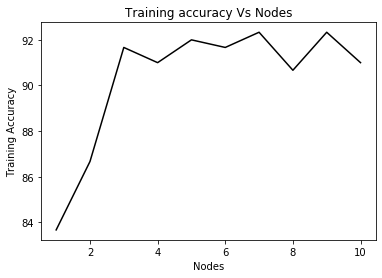

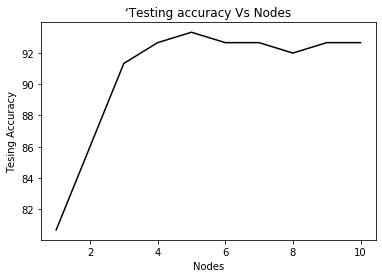

Based on maximum test accuracy: Nodes = 5, best_alpha = 0 & learning_rate = 0.1000 with training_accuracy = 92.00 & testing_accuracy = 93.33


In [293]:
alpharange = np.logspace(-6,0,5) 
learnrateinitrange = np.logspace(-3,-1,3)

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'alpharange': alpharange,
              'learnrateinitrange': learnrateinitrange}

prem = expand_grid(dictionary)


tr_acc_nn = []
ts_acc_nn = []
best_alpha_nn = []
best_lr_rate_nn = []

k = range(1,11)

for i in k:
    best_fit = None
    ts_acc1 = 0
    best_ts_acc = 0
    best_alpha = None
    best_rate = None
    for j in range(prem.shape[0]):
        nnc=MLPClassifier( hidden_layer_sizes=i, activation='relu',
                            solver='sgd', learning_rate='adaptive',
                            alpha=prem.iloc[j,0], learning_rate_init=prem.iloc[j,1],
                            max_iter=200)
        model_nn = nnc.fit(x_train, y_train)
        ts_acc1 = model_nn.score(x_test, y_test)*100
#         print('test_accuracy = %.2f, alpha = %d, Learning_rate = %.3f, nodes = %d' 
#               %(ts_acc1, prem.iloc[j,0], prem.iloc[j,1],i))
        if (ts_acc1 > best_ts_acc):
            best_ts_acc = ts_acc1
            best_alpha = prem.iloc[j,0]
            best_rate = prem.iloc[j,1]
            best_fit = model_nn
    tr_acc_nn.append(best_fit.score(x_train, y_train)*100)
    ts_acc_nn.append(best_fit.score(x_test, y_test)*100)
    best_alpha_nn.append(best_alpha)
    best_lr_rate_nn.append(best_rate)
    

plt.plot(k, tr_acc_nn, color = 'black')
plt.xlabel("Nodes")
plt.ylabel("Training Accuracy")
plt.title("Training accuracy Vs Nodes")
plt.show()

plt.plot(k, ts_acc_nn, color = 'black')
plt.xlabel("Nodes")
plt.ylabel("Tesing Accuracy")
plt.title("‘Testing accuracy Vs Nodes")
plt.show()

kkk = np.argmax(ts_acc_nn)
print('Based on maximum test accuracy: Nodes = %d, best_alpha = %d & \
learning_rate = %.4f with training_accuracy = %.2f & testing_accuracy = %.2f' 
      %(k[kkk], best_alpha_nn[kkk], best_lr_rate_nn[kkk],
        tr_acc_nn[kkk], ts_acc_nn[kkk]))



## B.

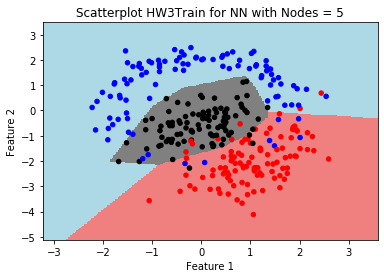

In [294]:
nnc=MLPClassifier( hidden_layer_sizes=kkk+1, activation='relu',
                            solver='sgd', learning_rate='adaptive',
                            alpha=best_alpha_nn[kkk], learning_rate_init=best_lr_rate_nn[kkk],
                            max_iter=200)
model_nn = nnc.fit(x_train, y_train)
Z = model_nn.predict(np.c_[x1mesh.ravel(), x2mesh.ravel()])

plot_func(x_train, y_train, Z, title = 'Scatterplot HW3Train for NN with Nodes = '+str(kkk+1))

## C.

SVM with degree 1 polynomial kernel (linear kernel) also has linear decision boundaries, similar to LDA, though does not have distributional assumptions (of normality) build in, so the shapes are different and performance better.

Likewise, the degree 2 polynomial kernel SVM is learning quadratic boundaries, giving similar regions to QDA, but with different position and changes to the shape since the SVM does not rely on normality assumptions of the features.

Interestingly, the RBF kernel also learns boundaries that are close to quadratic, although in general that is not the case. The main difference between those latter 3 methods is the regions further from the points (eg at the corners of the pictures). But close to the points they generally look similar.

The higher-order polynomial kernels generally agree with the QDA and RBF kernel around the points, but then on the edges of the figure have distinct shapes. The degree 3 kernel shares some resemblence with the 15 
15
-NN classifier.


## D.

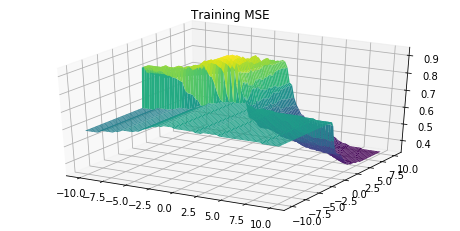

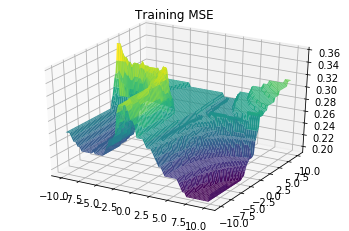

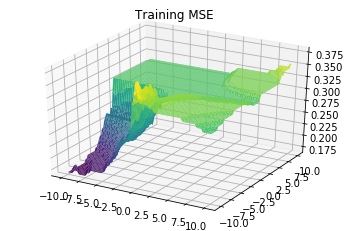

In [295]:
# %matplotlib notebook
%matplotlib inline
def plot3d_coef(model, edge_1, edge_2):
    w11 = np.linspace(-10, 10, 75)
    w21 = np.linspace(-10, 10, 75)
    kk1 = len(edge_1)

    # create a meshgrid and evaluate training MSE
    W11, W21 = np.meshgrid(w11, w21)
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ll1 = 1
    for i in range(kk1):
        MSEmesh = []
        for coef1, coef2 in np.c_[W11.ravel(), W21.ravel()]:
            model.coefs_[edge_1[i][0]][edge_1[i][1]][edge_1[i][2]] = coef1 
            model.coefs_[edge_2[i][0]][edge_2[i][1]][edge_2[i][2]] = coef2
            MSEmesh.append( [model.score(x_test, y_test)] )

        MSEmesh = np.array(MSEmesh)

        # Put the result into a color plot
        MSEmesh = MSEmesh.reshape(W11.shape)
#         ax = fig.add_subplot(ll1, kk1, i+1, projection='3d')
#         ax.plot_surface(W11, W21, MSEmesh, rstride=1, cstride=1,
#                         cmap='viridis', edgecolor='none')
        ax = plt.axes(projection='3d')
        ax.plot_surface(W11, W21, MSEmesh, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')
        ax.set_title('Training MSE');
        plt.show()
    
a = [[0,1,2], [0,0,1], [0,1,3]]
b = [[1,2,1], [1,1,2], [1,3,2]]
# a = [[0,0,1]]
# b = [[1,1,2]]
# a = [[0,1,3]]
# b = [[1,3,2]]

plot3d_coef(model_nn, a, b)

In [301]:
for i in range(3):
    print("\nInput Layer %d, Node %d to Hidden Layer %d, Node %d and then Hidden Layer %d, \
Node %d to Output Layer %d, Node %d" %(a[i][0]+1, a[i][1], a[i][0]+2, a[i][2],
         b[i][0]+1, b[i][1], b[i][0]+2, b[i][2]))
print('\n\nNote that this a single hidden layer newtwrk, Input, hidden and output \
layers are defined as 1,2 and 3 respectively')


Input Layer 1, Node 1 to Hidden Layer 2, Node 2 and then Hidden Layer 2, Node 2 to Output Layer 3, Node 1

Input Layer 1, Node 0 to Hidden Layer 2, Node 1 and then Hidden Layer 2, Node 1 to Output Layer 3, Node 2

Input Layer 1, Node 1 to Hidden Layer 2, Node 3 and then Hidden Layer 2, Node 3 to Output Layer 3, Node 2


Note that this a single hidden layer newtwrk, Input, hidden and output layers are defined as 1,2 and 3 respectively


For each of these plots, there are huge number of ups and downs and flat areas specially in 3rd plot. These plots also contain steep changes in some areas. That indicates there are lots of local maxima at which the solver could potentially get stuck at. For this reason, stochastic gradient descent algorithm could potentially get better results. Because, if there is no unique maxima (convex), it is possible to get an estimate of parameters at a local maxima. Similarly, if there are long some flat areas and if we cannot choose our initial parameter correctly, it will potentially get stuck at that flat areas. Also, if is only a small arear where there is a steep increase and that contain the global maxima, it is very important to supply appropriate initial value to have the best performance of the model. 

# Problem 5

## A.

In [297]:

from sklearn.preprocessing import StandardScaler


In [298]:
path = 'D:/ISU/COMS 574 - Introduction to Machine Learning/HW/HW4/'

df_train = pd.read_csv(path + 'digits-train.csv', sep=',', 
                       header=None)
df_test = pd.read_csv(path + 'digits-test.csv', sep=',', 
                      header=None)
tr_size = df_train.shape
ts_size = df_test.shape

x_train = np.array(df_train.loc[:,1:tr_size[1]])
y_train = np.array(df_train.loc[:,0])

x_test = np.array(df_test.loc[:,1:tr_size[1]])
y_test = np.array(df_test.loc[:,0])
scaler = StandardScaler()
scaler.fit(x_train)
Xtrain = scaler.transform(x_train)
Xtest = scaler.transform(x_test)

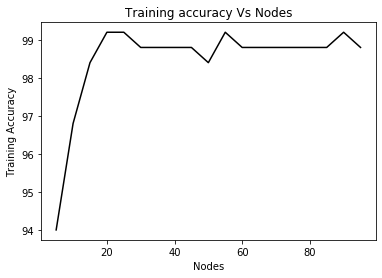

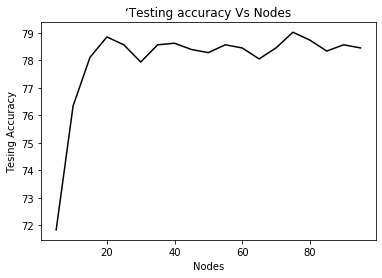

Based on maximum test accuracy: Nodes = 75, best_alpha = 1 & learning_rate = 0.3162 with training_accuracy = 98.80 & testing_accuracy = 79.03


In [299]:
%matplotlib inline
alpharange = np.logspace(-6,0,4) 
learnrate = np.logspace(-2,-0.5,4)

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'alpharange': alpharange,
              'learnrate': learnrate}

prem = expand_grid(dictionary)


tr_acc_nn = []
ts_acc_nn = []
best_alpha_nn = []
best_lr_rate_nn = []

k = range(5,100,5) 

for i in k:
    best_fit = None
    ts_acc1 = 0
    best_ts_acc = 0
    best_alpha = None
    best_rate = None
    for j in range(prem.shape[0]):
        nnc=MLPClassifier( hidden_layer_sizes=i, activation='relu',
                            solver='sgd', learning_rate='adaptive',
                            alpha=prem.iloc[j,0], learning_rate_init=prem.iloc[j,1],
                            max_iter=200)
        model_nn = nnc.fit(Xtrain, y_train)
        ts_acc1 = model_nn.score(Xtest, y_test)*100
        if (ts_acc1 > best_ts_acc):
            best_ts_acc = ts_acc1
            best_alpha = prem.iloc[j,0]
            best_rate = prem.iloc[j,1]
            best_fit = model_nn
    tr_acc_nn.append(best_fit.score(Xtrain, y_train)*100)
    ts_acc_nn.append(best_fit.score(Xtest, y_test)*100)
    best_alpha_nn.append(best_alpha)
    best_lr_rate_nn.append(best_rate)
    

plt.plot(k, tr_acc_nn, color = 'black')
plt.xlabel("Nodes")
plt.ylabel("Training Accuracy")
plt.title("Training accuracy Vs Nodes")
plt.show()

plt.plot(k, ts_acc_nn, color = 'black')
plt.xlabel("Nodes")
plt.ylabel("Tesing Accuracy")
plt.title("‘Testing accuracy Vs Nodes")
plt.show()

kkk1 = np.argmax(ts_acc_nn)
print('Based on maximum test accuracy: Nodes = %d, best_alpha = %d & \
learning_rate = %.4f with training_accuracy = %.2f & testing_accuracy = %.2f' 
      %(k[kkk1], best_alpha_nn[kkk1], best_lr_rate_nn[kkk1],
        tr_acc_nn[kkk1], ts_acc_nn[kkk1]))

In DTC, training accuracy look like smoothly increasing with respect to number of depths, Similarly, for the RF, training accuracy is increasing with respect to maximum number of depth but at some point, it started to decrease. For the GB, it has ups and downs for the training accuracy but at some point of max depth, training accuracy is about 100%.

However, for NN model, it has some ups and downs, and even with the higher number of nodes, training accuracy is not always increasing.

Similarly, for the testing accuracy, there is lot of variation with respect to number of nodes for NN model compare to DTC, RF and GB models where testing accuracy have relatively smooth increasing and decreasing pattern though that might not be true always. That indicates for NN model, it is most likely to have local maxima if we can not choose correct initial values. 

## B.

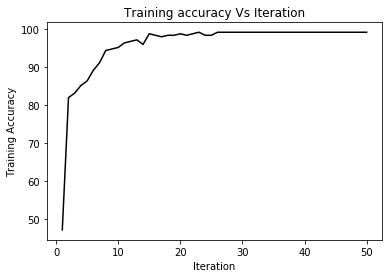

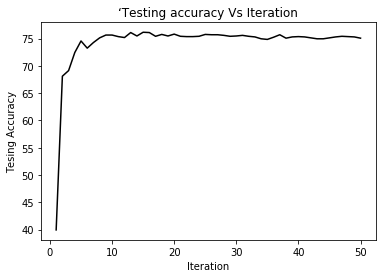



Based on maximum test accuracy: Iteration = 23, best_alpha = 0 & learning_rate = 0.3162 with training_accuracy = 99.20 & testing_accuracy = 75.37


Based on maximum test accuracy: Iteration = 15, best_alpha = 0 & learning_rate = 0.3162 with training_accuracy = 98.80 & testing_accuracy = 76.17


In [300]:
%matplotlib inline
alpharange = 0.0
learnrate = best_lr_rate_nn[kkk1]
iteration = range(1, 51)

tr_acc_nn_1 = []
ts_acc_nn_1 = []
best_alpha_nn_1 = []
best_lr_rate_nn_1 = []

  
nnc=MLPClassifier( hidden_layer_sizes=k[kkk1], activation='relu',
                    solver='sgd', learning_rate='adaptive',
                    alpha=alpharange, learning_rate_init=learnrate,
                    max_iter=200)
for i in iteration:
    ts_acc1_1 = 0
    best_ts_acc_1 = 0
    model_nn = nnc.partial_fit(Xtrain, y_train, np.unique(y_train)) 
    tr_acc_nn_1.append(model_nn.score(Xtrain, y_train)*100)
    ts_acc_nn_1.append(model_nn.score(Xtest, y_test)*100)
    

plt.plot(iteration, tr_acc_nn_1, color = 'black')
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.title("Training accuracy Vs Iteration")
plt.show()

plt.plot(iteration, ts_acc_nn_1, color = 'black')
plt.xlabel("Iteration")
plt.ylabel("Tesing Accuracy")
plt.title("‘Testing accuracy Vs Iteration")
plt.show()

kkk2 = np.argmax(tr_acc_nn_1)
print('\n\nBased on maximum test accuracy: Iteration = %d, best_alpha = %d & \
learning_rate = %.4f with training_accuracy = %.2f & testing_accuracy = %.2f' 
      %(iteration[kkk2], alpharange, learnrate,
        tr_acc_nn_1[kkk2], ts_acc_nn_1[kkk2]))

kkk3 = np.argmax(ts_acc_nn_1)
print('\n\nBased on maximum test accuracy: Iteration = %d, best_alpha = %d & \
learning_rate = %.4f with training_accuracy = %.2f & testing_accuracy = %.2f' 
      %(iteration[kkk3], alpharange, learnrate,
        tr_acc_nn_1[kkk3], ts_acc_nn_1[kkk3]))

At around 25 iteration, training accuracy curve seems to flatten out.

At round 15 iteration, testing accuracy curve seems to fallten out.